# Guía Ciudadana

El siguiente es el código para bajar los archivos para el ejercicio.

In [2]:
source("Import Files.R", echo = T)


> library(readxl)

> library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




> temp <- tempfile(fileext = ".zip")

> download.file("https://drive.google.com/uc?authuser=0&id=1qjbm1rmLRf9jnjox1ZhO-ftkOkvKy1UH&export=download", 
+     temp)

> out <- unzip(temp, exdir = tempdir())

> Adj_2018 <- read_excel(out[3])

> Adj_2019 <- read_excel(out[4])

> Adj_2015 <- read_excel(out[5])

> Adj_2016 <- read_excel(out[6])

> Adj_2017 <- read_excel(out[7])

> Of_2015 <- read_excel(out[8])

> Of_2016 <- read_excel(out[9])

> Of_2017 <- read_excel(out[10])

> Of_2018_19 <- read_excel(out[11])

> SIAC_18_19 <- read_excel(out[1])

> SIAC_15_17 <- read_excel(out[12])

> SIAC_18_19$`Año de adjudicación` <- as.numeric(SIAC_18_19$`Año de adjudicación`)

> Adj_Total <- bind_rows(Adj_2015, Adj_2016, Adj_2017, 
+     Adj_2018, Adj_2019)

> Of_Total <- bind_rows(Of_2015, Of_2016, Of_2017, Of_2018_19)

> SIAC_Total <- bind_rows(SIAC_15_17, SIAC_18_19)


Análisis exploratorio Instituciones

Para entender los datos que tenemos, podemos empezar por ver cuales son las instituciones que mas adjudican. Para empezar, haremos un análisis exploratorio con un Pareto. Para simplificar la interpretación, Hemos desarrollado un Alias para cada institución. El siguiente código importa una tabla con el Alias para incorporarlo al análisis. 

In [5]:
library(ggplot2)
library(stringr)
library(gridExtra)
temp <- tempfile(fileext = ".xlsx")
download.file("https://drive.google.com/uc?authuser=0&id=1Kl6--5GnckLUWQzUwGOZ96fHFxS0cyGB&export=download",temp)
out <- unzip(temp, exdir = tempdir())
Instituciones <- read_excel(temp,
                            sheet = "Inst. Publicas")


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



Podemos ahora generar una tabla para entender la cantidad adjudicada por cada institución entre 2015 y el 2019, usando el Alias para identificar las instituciones.

In [8]:
Adj <- Adj_Total %>% group_by(INSTITUCION, CED_INSTITUCION) %>%
  summarise(Monto = sum(MONTO_ADJUDICADO), n = n()) %>%
  arrange(desc(Monto)) %>%
  left_join(Instituciones, by = "CED_INSTITUCION") %>%
  select(INSTITUCION, CED_INSTITUCION, Monto,  Alias)
Adj$Monto_Acumulado <- cumsum(Adj$Monto)
Adj$Alias <- factor(Adj$Alias, levels=Adj$Alias)

Una vez echo esto, podemos ahora generar graficos de Pareto para entender mejor los datos.

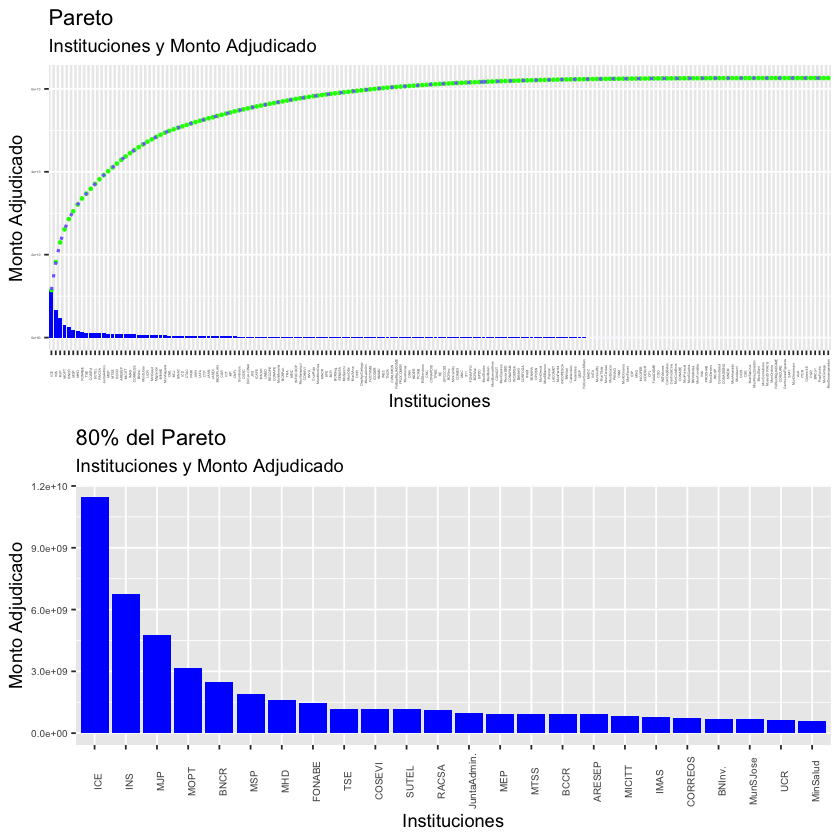

In [9]:
AIM <- ggplot(Adj, aes(x=Adj$Alias)) + 
  geom_bar(aes(y=Adj$Monto), fill='blue', stat="identity") +
  geom_point(aes(y=Adj$Monto_Acumulado), color = rgb(0, 1, 0), pch=16, size=1) +
  geom_path(aes(y=Adj$Monto_Acumulado, group=1), colour="slateblue1", lty=3, size=0.9) +
  theme(axis.text.x = element_text(angle=90, vjust=0.6), axis.text=element_text(size=2)) +
  labs(title = "Pareto", subtitle = "Instituciones y Monto Adjudicado", x = 'Instituciones', y = 'Monto Adjudicado') 
#  theme(axis.text.x = element_blank())

Adj_filt <- Adj %>%
  filter(Monto_Acumulado< 4.8e+10)
           
AIM_Filt <- ggplot(Adj_filt, aes(x=Adj_filt$Alias)) + 
  geom_bar(aes(y=Adj_filt$Monto), fill='blue', stat="identity") +
  theme(axis.text.x = element_text(angle=90), axis.text=element_text(size=6)) +
  labs(title = "80% del Pareto", subtitle = "Instituciones y Monto Adjudicado", x = 'Instituciones', y = 'Monto Adjudicado') 
grid.arrange(AIM, AIM_Filt, nrow = 2)

las instituciones que NO están en SICOP no manejan un código de mercancías uniforme, por lo que no se puede obtener un reporte con códigos de técnologia.

Sin embargo en el SIAC si se manejan las subpartidas presupuestarias, las cuales, pese a que abarcan más bienes y servicios que los desados, señalan los códigos de técnologia en el SICOP, es la mejor aproximación que podría realizarse. 

Las siguientes subpartidas se utilizaron para aproximarse a las compras tecnológicas del estado utilizando el SIAC:

* 1.01.03-- Alquiler de equipo de cómputo
* 1.01.04-- Alquiller de equipo y derechos para telecomunicaciones 
* 1.03.07-- Servicios de transferencia electrónica de información//(2019) Servicios de tecnologías de información 
* 1.04.03-- Servicios de ingeniería y arquitectura 
* 1.04.05-- Servicios de desarrollo de sistemas informáticos //(2019) Servicios informáticos
* 1.04.99--Otros servicios de gestión y apoyo
* 1.08.08--Mantenimiento y reparación de equipo de cómputo y sistemas de información
* 2.03.04--Materiales y productos eléctronicos, telefónicos y de cómputo
* 2.99.01--Útiles y materiales de oficina y cómputo
* 5.01.03--Equipo de comunicación
* 5.01.05-- Equipo y programas de cómputo//(2019) Equipo de cómputo
* 5.99.03--Bienes intangibles


El siguiente código genera las clasificaciones de tecnología. El código requiere de niveles de procesamiento mas grandes que los disponible en esta plataforma. Para verificar el código, puede bajarlo y correrlo con mas procesamiento. 

In [10]:
#setwd("./Text Mining")
#source("SIAC_Tech.R", echo = T)
#setwd('..')